In [1]:
#conda install -c conda-forge catboost
import numpy as np
import sympy as sp
import pandas as pd 
import matplotlib.pyplot as plt
import pydotplus
import graphviz
from scipy import stats
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score,accuracy_score 
from sklearn.naive_bayes import MultinomialNB
from catboost import CatBoostClassifier 

# One Hot Encoding

In [2]:
#read the after preprocessing dataset:
df = pd.read_csv('data_after_preprocessing.csv')

In [3]:
df

,SUB1,HERFLG,ROUTE1,PSOURCE,ALCFLG,FREQ_ATND_SELF_HELP_D,DIVISION,SUB3,DSMCRIT,IDU,DROP
0,2,0,1,1,1,1,9,1,4,0,1
1,2,0,1,1,1,2,9,10,4,0,0
2,5,1,4,1,0,1,9,1,5,1,0
3,5,1,2,1,0,1,8,4,5,0,0
4,5,1,4,1,0,1,9,19,5,1,0
...,...,...,...,...,...,...,...,...,...,...,...
60620,10,1,2,7,0,5,8,1,8,0,0
60621,10,0,3,7,0,5,8,1,8,0,1
60622,2,0,1,7,1,5,8,1,3,0,0
60623,4,0,2,7,0,1,8,1,10,0,0


In [4]:
X = df.drop('DROP', axis = 1)
Y = df['DROP']

In [5]:
# generate binary values using get_dummies
X_dum = pd.get_dummies(X, columns=X.columns)
X_dum

,SUB1_2,SUB1_3,SUB1_4,SUB1_5,SUB1_6,SUB1_7,SUB1_8,SUB1_9,SUB1_10,SUB1_11,...,DSMCRIT_12,DSMCRIT_13,DSMCRIT_14,DSMCRIT_15,DSMCRIT_16,DSMCRIT_17,DSMCRIT_18,DSMCRIT_19,IDU_0,IDU_1
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60620,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
60621,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
60622,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
60623,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [6]:
#Split the dataset into training set and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X_dum, Y, test_size=0.3, random_state=0)

# Decision Tree

In [7]:
#Applied the training set to decision tree model 
clf=tree.DecisionTreeClassifier(criterion='entropy')
model=clf.fit(X_train, Y_train)

In [8]:
#Predict instances' class from the testing set 
predict=clf.predict(X_test)
predict

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [9]:
print('The proportion of correctly categorizing cases, in testing set:',accuracy_score(Y_test,predict))

The proportion of correctly categorizing cases, in testing set: 0.7279524961513085


In [10]:
print('The f1 score of decision tree model is',f1_score(Y_test,predict))

The f1 score of decision tree model is 0.8125047366426678


In [11]:
k_fold=cross_val_score(model,X_train, Y_train,cv=10)
print('The model accuracy rates of 10 k_fold cross validations:\n',k_fold)

The model accuracy rates of 10 k_fold cross validations:
 [0.72478794 0.73162111 0.73114986 0.72596607 0.72408106 0.72196041
 0.72761546 0.73226491 0.72095216 0.7216592 ]


In [12]:
print('The average model accuracy rates over 10 k_fold cross validations:\n'
      ,np.mean(k_fold))

The average model accuracy rates over 10 k_fold cross validations:
 0.7262058170656643


In [15]:
dot_data=tree.export_graphviz(clf,out_file=None,
                              feature_names=X_dum.columns)
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('decision_tree_full.pdf')


(process:2572): GLib-GIO-WARNING **: 16:12:16.891: Unexpectedly, UWP app `Evernote.Evernote_10.49.4.0_x64__q4d96b2w5wcc2' (AUMId `Evernote.Evernote_q4d96b2w5wcc2!Evernote') supports 1 extensions but has no verbs



True

# Trimmed Decision Tree, 10 leyers

In [16]:
#Construct a pre-pruning decision tree, set the limitation of leyers to 10:
clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=10)
model=clf.fit(X_train, Y_train)

In [17]:
#Predict instances' class from the testing set 
predict=clf.predict(X_test)
predict

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [18]:
print('The proportion of correctly categorizing cases, in testing set (10-leyer tree):\n',accuracy_score(Y_test,predict))

The proportion of correctly categorizing cases, in testing set (10-leyer tree):
 0.7418627666593358


In [19]:
print('The f1 score of 10-leyer decision tree model is',f1_score(Y_test,predict))

The f1 score of 10-leyer decision tree model is 0.8320154567247486


In [20]:
k_fold=cross_val_score(model,X_train, Y_train,cv=10)
print('The model accuracy rates of 10 k_fold cross validations (10-leyer tree):\n',k_fold)

The model accuracy rates of 10 k_fold cross validations (10-leyer tree):
 [0.73986805 0.75094251 0.75023563 0.73350613 0.73798303 0.74057493
 0.74340245 0.75041244 0.73839265 0.74546312]


In [21]:
print('The average model accuracy rates over 10 k_fold cross validations (10-leyer tree):'
      ,np.mean(k_fold))

The average model accuracy rates over 10 k_fold cross validations (10-leyer tree): 0.7430780930303125


In [22]:
dot_data=tree.export_graphviz(clf,out_file=None,
                              feature_names=X_dum.columns)
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('decision_tree_max10.pdf')

True

# Trimmed Decision Tree, 7 leyers

In [23]:
#Construct a pre-pruning decision tree, set the limitation of leyers to 7:
clf=tree.DecisionTreeClassifier(criterion='entropy',max_depth=7)
model=clf.fit(X_train, Y_train)

In [24]:
#Predict instances' class from the testing set 
predict=clf.predict(X_test)
predict

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [25]:
print('The proportion of correctly categorizing cases, in testing set (7-leyer tree):\n',accuracy_score(Y_test,predict))

The proportion of correctly categorizing cases, in testing set (7-leyer tree):
 0.7385638882779855


In [26]:
print('The f1 score of 7-leyer decision tree model is',f1_score(Y_test,predict))

The f1 score of 7-leyer decision tree model is 0.8330934746744357


In [27]:
k_fold=cross_val_score(model,X_train, Y_train,cv=10)
print('The model accuracy rates of 10 k_fold cross validations (7-leyer tree):\n',k_fold)

The model accuracy rates of 10 k_fold cross validations (7-leyer tree):
 [0.74245994 0.7438737  0.75259189 0.73279925 0.73114986 0.74081056
 0.7368049  0.74664153 0.73650719 0.74122083]


In [28]:
print('The average model accuracy rates over 10 k_fold cross validations (7-leyer tree):'
      ,np.mean(k_fold))

The average model accuracy rates over 10 k_fold cross validations (7-leyer tree): 0.7404859653522584


In [29]:
dot_data=tree.export_graphviz(clf,out_file=None,
                              feature_names=X_dum.columns)
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('decision_tree_max7.pdf')

True

# Random Forest

In [30]:
#Construct a random forest model with number of decision trees=1000
rf=RandomForestClassifier(n_estimators=1000,random_state=50)
rf.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=1000, random_state=50)

In [31]:
predict = rf.predict(X_test)

In [32]:
print('The proportion of correctly categorizing cases, in testing set (random forest):\n',rf.score(X_test,Y_test))

The proportion of correctly categorizing cases, in testing set (random forest):
 0.7394435891796789


In [33]:
print('The f1 score of random forest is',f1_score(Y_test,predict))

The f1 score of random forest is 0.8253160824210255


In [34]:
#Calculate the influences of each attribute imposing to the classification result
imp=rf.feature_importances_
print(imp)

[3.01783427e-02 7.17194287e-03 8.65737381e-03 1.32291361e-02
 8.20512409e-04 8.58825049e-03 1.28504458e-03 9.40696508e-04
 1.36584491e-02 3.98360517e-03 8.99881705e-04 2.86559263e-03
 9.98100813e-05 1.81656675e-05 7.01171496e-04 3.64130168e-04
 4.32545128e-04 3.31975103e-03 1.41349958e-02 1.55826823e-02
 2.70580005e-02 1.61895307e-02 1.28624744e-02 8.63881855e-03
 4.24241040e-03 3.43916663e-02 1.43780529e-02 1.47768640e-02
 3.36806456e-03 3.35741535e-03 1.74839761e-02 3.81056110e-02
 2.27173559e-02 2.30565631e-02 6.07260807e-02 2.18736283e-02
 1.22561986e-02 3.29201822e-02 6.71920748e-03 6.65038243e-04
 9.61837474e-03 1.81100809e-02 2.85480735e-02 2.34402452e-02
 1.11951075e-02 3.02804258e-02 1.74544716e-02 2.74471541e-02
 1.71528901e-02 3.32201807e-02 1.06176692e-02 1.18681301e-02
 1.90040968e-02 4.64861461e-03 7.00694436e-04 9.03814316e-03
 6.40048702e-04 2.65179736e-03 9.47172021e-03 3.21465470e-03
 6.35384202e-03 8.21257077e-03 7.79352118e-05 4.76673389e-04
 1.62917661e-03 3.600965

In [35]:
feature_names=X_dum.columns

<function matplotlib.pyplot.show(close=None, block=None)>

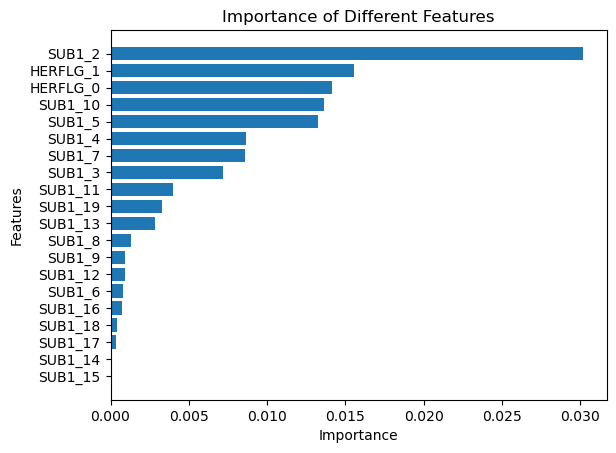

<Figure size 2000x2200 with 0 Axes>

In [36]:
#Visualize the influences (importances) of each attribute 
zip(imp[0:20],feature_names)
imp,feature_names=zip(*sorted(zip(imp[0:20],feature_names)))
plt.barh(range(len(feature_names)),imp,align='center')
plt.yticks(range(len(feature_names)),feature_names)
plt.ylabel('Features')
plt.xlabel('Importance')
plt.title('Importance of Different Features')
plt.figure(figsize=(20,22))
plt.show 

# Naive Bayesian Classifier: Multinomial

In [37]:
#Construct a Multinomial Naive Bayes classifier:
model=MultinomialNB()
model.fit(X_train, Y_train)

MultinomialNB()

In [38]:
predict = model.predict(X_test)

In [39]:
#Every instance's probability of being categorized to two different classes
model.predict_proba(X_test)

array([[0.01483096, 0.98516904],
       [0.03353512, 0.96646488],
       [0.93367233, 0.06632767],
       ...,
       [0.25883684, 0.74116316],
       [0.02040189, 0.97959811],
       [0.01483096, 0.98516904]])

In [40]:
print('The proportion of correctly categorizing cases, in testing set (Multinomial Naive Bayes):\n',accuracy_score(Y_test,predict))

The proportion of correctly categorizing cases, in testing set (Multinomial Naive Bayes):
 0.6760501429513965


In [41]:
print('The f1 score of Multinomial Naive Bayes model is',f1_score(Y_test,predict))

The f1 score of Multinomial Naive Bayes model is 0.7615154213551364


In [42]:
k_fold=cross_val_score(model,X_train, Y_train,cv=10)
print('The model accuracy rates of 10 k_fold cross validations (Naive Bayes):\n',k_fold)

The model accuracy rates of 10 k_fold cross validations (Naive Bayes):
 [0.66140434 0.67884072 0.67130066 0.67389255 0.65292177 0.667295
 0.66352498 0.68512845 0.67428706 0.66320999]


In [43]:
print('The average model accuracy rates over 10 k_fold cross validations (Naive Bayes):'
      ,np.mean(k_fold))

The average model accuracy rates over 10 k_fold cross validations (Naive Bayes): 0.6691805519675029


# Catboost 

In [44]:
#Construct a catetorical boost classifier
model_cb=CatBoostClassifier(iterations=100,eval_metric='F1')
model_cb.fit(X_train,Y_train,cat_features=feature_names,plot=True,
             eval_set=(X_test,Y_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.217752
0:	learn: 0.8249352	test: 0.8242378	best: 0.8242378 (0)	total: 144ms	remaining: 14.2s
1:	learn: 0.8260591	test: 0.8252664	best: 0.8252664 (1)	total: 154ms	remaining: 7.52s
2:	learn: 0.8280257	test: 0.8275594	best: 0.8275594 (2)	total: 164ms	remaining: 5.29s
3:	learn: 0.8305156	test: 0.8306718	best: 0.8306718 (3)	total: 173ms	remaining: 4.15s
4:	learn: 0.8316699	test: 0.8320595	best: 0.8320595 (4)	total: 181ms	remaining: 3.44s
5:	learn: 0.8320620	test: 0.8320701	best: 0.8320701 (5)	total: 191ms	remaining: 3s
6:	learn: 0.8331808	test: 0.8329031	best: 0.8329031 (6)	total: 202ms	remaining: 2.68s
7:	learn: 0.8331633	test: 0.8330195	best: 0.8330195 (7)	total: 208ms	remaining: 2.4s
8:	learn: 0.8332907	test: 0.8329083	best: 0.8330195 (7)	total: 218ms	remaining: 2.21s
9:	learn: 0.8331019	test: 0.8333917	best: 0.8333917 (9)	total: 228ms	remaining: 2.05s
10:	learn: 0.8333661	test: 0.8337777	best: 0.8337777 (10)	total: 238ms	remaining: 1.92s
11:	learn: 0.8336520	test:

97:	learn: 0.8436980	test: 0.8364948	best: 0.8373984 (74)	total: 1.05s	remaining: 21.5ms
98:	learn: 0.8435901	test: 0.8365971	best: 0.8373984 (74)	total: 1.07s	remaining: 10.8ms
99:	learn: 0.8436931	test: 0.8362601	best: 0.8373984 (74)	total: 1.08s	remaining: 0us

bestTest = 0.837398374
bestIteration = 74

Shrink model to first 75 iterations.


In [45]:
predict=model_cb.predict(X_test)
predict

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [46]:
print('The f1 score of Catboost classifier is',f1_score(Y_test,predict))

The f1 score of Catboost classifier is 0.8373983739837398


In [47]:
print('The proportion of correctly categorizing cases, in testing set :\n',accuracy_score(Y_test,predict))

The proportion of correctly categorizing cases, in testing set :
 0.7514844952716077
